# Lista 3

### Zaimplementowane biblioteki

In [13]:
import ctypes #tablice niskopoziomowe
import random
import time
import queue
from html.parser import HTMLParser
from copy import copy


### Zadanie 1

In [2]:
class DynamicArray:
    
    def __init__(self):
        self._n = 0 #liczba elementów
        self._capacity = 1 #rozmiar tablicy
        self._A = self._make_array(self._capacity) #właściwa tablica
        
    def __len__(self):
        return self._n
    
    def __getitem__(self,k):
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]
    
    def append(self,obj):
        if self._n == self._capacity:
            self._resize(2*self._capacity)
        self._A[self._n] = obj
        self._n += 1
        
    def _resize(self,c):
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self,c):
        return (c*ctypes.py_object)()

    def insert(self, k , value):
        B = self._A[:k] + [value] + self._A[k:]
        self._A = B
        self._n += 1
    
    def remove(self, value):
        for i in range(self._n-1):
            if self._A[i] == value:
                self._A = self._A[:i] + self._A[i+1:] 
                self._n -= 1
    
    def expand(self, seq):
        if self._n == self._capacity:
            self._resize(2*self._capacity)
        if type(seq) != list:
            raise TypeError('Sequence input is not a list')
        B = self._A + seq
        self._A = B
        self._n += len(seq)

    def __str__(self):
        values = [self._A[i] for i in range(self._n)]
        return f'{values}'

array = DynamicArray()
array._make_array(10)
array.append(1)
print(array)
array.append(2)
print(array)
array.insert(1, 7)
print(len(array))
print(array)
array.insert(3, 8)
print(array)
array.remove(2)
print(array)
print(len(array))
array.expand([9,8,7])
print(array)
print(len(array))

[1]
[1, 2]
3
[1, 7, 2]
[1, 7, 2, 8]
[1, 7, 8]
3
[1, 7, 8, 9, 8, 7]
6


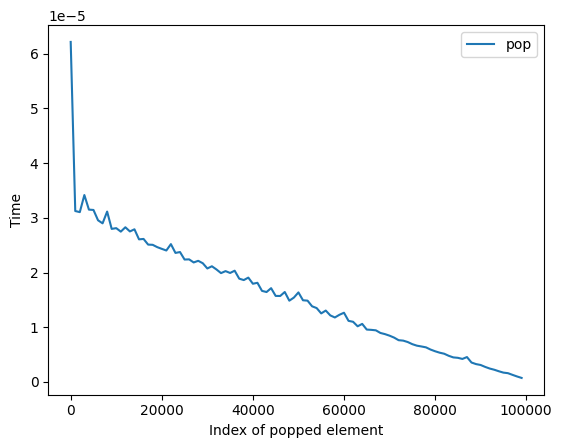

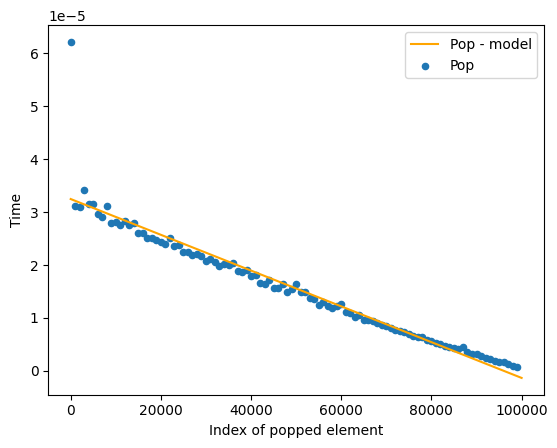

In [4]:
indexes = [i for i in range(0, 100000, 1000)]
A = [i for i in range(1, 100000)]
times = [[0 for i in range(len(indexes))] for j in range(len(indexes))]

for j in range(len(indexes)):
    for i in range(len(indexes)):
        start = time.perf_counter()
        A.pop(indexes[i])
        stop = time.perf_counter()

        A.insert(indexes[i], random.randint(-50,50))
        times[i][j] = stop-start

avg = [sum(times[i])/len(indexes) for i in range(len(indexes))]
    

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

plt.plot(indexes, avg, label='pop')
plt.xlabel('Index of popped element')
plt.ylabel('Time')
plt.legend()
plt.show()

def f(x, a, b):     return x*a + b

popt, pcov = curve_fit(f, indexes, avg)


x = np.linspace(1, 100000)

plt.clf()
plt.plot(x, f(x, *popt), label='Pop - model', color='orange')
plt.scatter(indexes, avg, label='Pop', s=20)

plt.xlabel('Index of popped element')
plt.ylabel('Time')
plt.legend()
plt.show()

#Metoda pop ma złożoność O(1) gdy popujemy ostatni element i srednio O(n) kiedy popujemy n-ty element(nieostatni)

### Zadanie 3

In [5]:
def sumOfEl(n):
    summation = 0
    array = [[i+j+1 for i in range(n)] for j in range(n)]
    print(array)
    for i in range(n):
        for j in range(n):
            summation += array[i][j]
    return summation
print(sumOfEl(7))

[[1, 2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7, 8], [3, 4, 5, 6, 7, 8, 9], [4, 5, 6, 7, 8, 9, 10], [5, 6, 7, 8, 9, 10, 11], [6, 7, 8, 9, 10, 11, 12], [7, 8, 9, 10, 11, 12, 13]]
343


### Zadanie 4

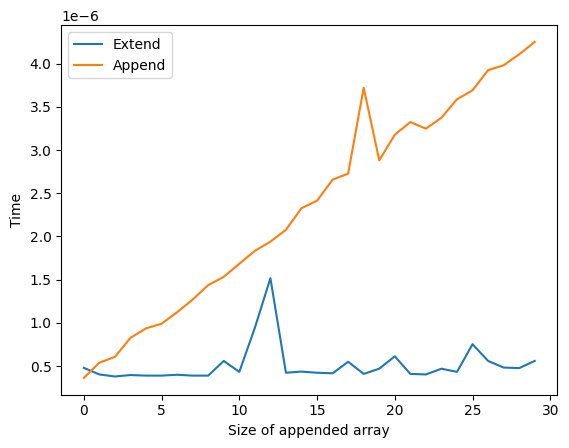

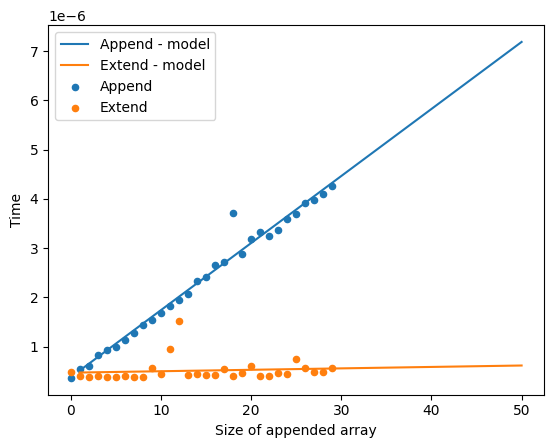

In [6]:
list_lengths = [i for i in range(30)]
extend_times = [[0 for i in list_lengths] for i in list_lengths]
append_times = [[0 for i in list_lengths] for i in list_lengths]
A = [1, 1, 1]

for j in list_lengths:
    for i in list_lengths:
        B, C = A, A

        appended_list = [random.randint(-20, 20) for j in range(i)]

        start_e = time.perf_counter()
        B.extend(appended_list)
        stop_e = time.perf_counter()

        start_a = time.perf_counter()
        for element in appended_list:
            C.append(element)
        stop_a = time.perf_counter()

        extend_times[i][j] = stop_e-start_e
        append_times[i][j] = stop_a-start_a

avg_extend = [sum(extend_times[i])/len(list_lengths) for i in list_lengths]
avg_append = [sum(append_times[i])/len(list_lengths) for i in list_lengths]

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

plt.plot(list_lengths, avg_extend, label='Extend')
plt.plot(list_lengths, avg_append, label='Append')
plt.xlabel('Size of appended array')
plt.ylabel('Time')
plt.legend()
plt.show()

####

def func(x, a, b):    return x*a + b

a_popt, a_pcov = curve_fit(func, list_lengths, avg_append)
e_popt, e_pcov = curve_fit(func, list_lengths, avg_extend)

x = np.linspace(1, 50)

plt.clf()
plt.plot(x, func(x, *a_popt), label='Append - model')
plt.plot(x, func(x, *e_popt), label='Extend - model')

plt.scatter(list_lengths, avg_append, label='Append', s=20)
plt.scatter(list_lengths, avg_extend, label='Extend', s=20)
plt.xlabel('Size of appended array')
plt.ylabel('Time')
plt.legend()
plt.show()

### Zadanie 5

In [7]:
class Empty(Exception):
    pass

class Queue:
    DEFAULT_CAPACITY = 10
    
    def __init__(self):
        self._data = [None]*Queue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]
    
    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        if self._size < Queue.DEFAULT_CAPACITY//2:
            for element in self._data:
                if element == None:
                    self._data = self._data[:self._data.index(element)] + self._data[self._data.index(element)+1:]
            Queue.DEFAULT_CAPACITY = Queue.DEFAULT_CAPACITY//2
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front+1)%len(self._data)
        self._size -= 1
        return value
    
    def enqueue(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        avail = (self._front + self._size)%len(self._data)
        self._data[avail] = e
        self._size += 1
        
    def _resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size): #only existing elements
            self._data[k] = old[walk]
            walk = (1 + walk)%len(old)
        self._front = 0  

    def __str__(self) -> str:
        return f'{self._data}'


a = Queue()
a.enqueue(1)
a.enqueue(1)
a.enqueue(1)
a.enqueue(2)
a.dequeue()
a.enqueue(3)
a.dequeue()
print(a)
print(a.DEFAULT_CAPACITY)

[3, None, 1, 2]
5


### Zadanie 6

In [9]:
class Queue:
    DEFAULT_CAPACITY = 10
    
    def __init__(self):
        self._data = [None]*Queue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0
        self._back = 0
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise queue.Empty('Queue is empty')
        return self._data[self._front]
    
    def last(self):
        if self.is_empty():
            raise queue.Empty('Queue is empty')
        return self._data[self._back]
    
    def delete_first(self):
        if self.is_empty():
            raise queue.Empty('Queue is empty')

        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front+1)
        self._size -= 1

        self.cleaning()
        return value
    
    def delete_last(self):
        if self.is_empty():
            raise queue.Empty('Queue is empty')

        value = self._data[self._back]
        self._data[self._back] = None
        self._back = (self._size + self._front - 2)
        self._size -= 1

        self.cleaning()
        return value
    
    def add_first(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        
        self._resize(len(self._data)+1, True)

        avail = (self._front)
        self._data[avail] = e
        self._size += 1

        self.cleaning()

    def add_last(self, e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))

        self._resize(len(self._data))

        avail = (self._size+self._front)
        self._data[avail] = e
        self._size += 1

        self.cleaning()
        
    def _resize(self, cap, moving_elements=False):
        old = self._data
        walk = self._front
        self._back = self._size + self._front
        self._data = [None]*cap

        if moving_elements:   
            old.insert(0, None)
            walk = self._front

        for k in range(self._size): #only existing elements
            if not moving_elements:
                self._data[k] = old[walk]
                walk = (1 + walk)%len(old)
            elif moving_elements:
                self._data[k+1] = old[walk+1]
                walk = (1 + walk)%(len(old)-1)

        self._front = 0
    
    def cleaning(self):
        initial_length = len(self._data)
        self._data = [self._data[k] for k in range(initial_length) if self._data[k] is not None]
        self._front = 0
        self._back = self._size - 1
    
        
D = Queue()

for i in range(15):
    D.add_first(5)
    D.add_last(3)

for i in range(15):
    print( D.delete_first() )
    print( D.delete_last() )



5
3
5
3
5
3
5
3
5
3
5
3
5
3
5
3
5
3
5
3
5
3
5
3
5
3
5
3
5
3


### Zadanie 7

In [11]:
class Empty(Exception):
    pass

class Stack:
    def __init__(self):
        self._data = [] #nowy pusty stos
        
    def __len__(self):
        return len(self._data)
    
    def is_empty(self):
        return len(self._data)==0
    
    def push(self,e):
        self._data.append(e)
        
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]
    
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop()     

class MyHTMLParser(HTMLParser):
    startings = []
    endings = []
    def handle_starttag(self, tag, attrs):
        MyHTMLParser.startings.append(tag)
    def handle_endtag(self, tag):
        MyHTMLParser.endings.append(f'</{tag}>')

def checkHTML(text):
    parser = MyHTMLParser()
    stack = Stack()
    parser.feed(text)
    endings_check = [f'</{i}>' for i in parser.startings]
    startings_check = [f'<{i}>' for i in parser.startings]
    x = text.split()
    for element in x:
        if element in startings_check:
            stack.push(element)
        if element in parser.endings:
            if stack.is_empty():
                return False
            if endings_check.index(element) != startings_check.index(stack.pop()):
                return False
    return stack.is_empty()
            

print(checkHTML("""
<body>
<center>
<h1> The Little Boat </h1>
</center>
<p> The storm tossed the little
boat like a cheap sneaker in an
old washing machine. The three
drunken fishermen were used to
such treatment, of course, but
not the tree salesman, who even as
a stowaway now felt that he
had overpaid for the voyage. </p>
<ol>
<li> Will the salesman die? </li>
<li> What color is the boat? </li>
<li> And what about Naomi? </li>
</ol>
</body>
"""))


True


### Zadanie 8

In [14]:
class Empty(Exception):
    pass

class Stack:
    def __init__(self):
        self._data = [] #nowy pusty stos
        
    def __len__(self):
        return len(self._data)
    
    def is_empty(self):
        return len(self._data)==0
    
    def push(self,e):
        self._data.append(e)
        
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]
    
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop()  
 

def permutations(n):
    stack = Stack()
    for i in range(n):
        stack.push(i+1)

    current = [[stack.pop()]]
    done = []

    while stack.__len__() !=0:
        next_pop = stack.pop()
        for element in current:
            for i in range(len(element)+1):
                next_per = copy(element)
                next_per.insert(i, next_pop)
                done.append(next_per)
        current = copy(done)
        done = []
    return current
print(permutations(4))

[[1, 2, 3, 4], [2, 1, 3, 4], [2, 3, 1, 4], [2, 3, 4, 1], [1, 3, 2, 4], [3, 1, 2, 4], [3, 2, 1, 4], [3, 2, 4, 1], [1, 3, 4, 2], [3, 1, 4, 2], [3, 4, 1, 2], [3, 4, 2, 1], [1, 2, 4, 3], [2, 1, 4, 3], [2, 4, 1, 3], [2, 4, 3, 1], [1, 4, 2, 3], [4, 1, 2, 3], [4, 2, 1, 3], [4, 2, 3, 1], [1, 4, 3, 2], [4, 1, 3, 2], [4, 3, 1, 2], [4, 3, 2, 1]]


### Zadanie 10

In [15]:
class Stack:
    def __init__(self):
        self._data = [] #nowy pusty stos

    def __len__(self):
        return len(self._data)
    
    def is_empty(self):
        return len(self._data)==0
    
    def push(self,e):
        self._data.append(e)
        
    def top(self):
        if self.is_empty():
            raise queue.Empty('Stack is empty')
        return self._data[-1]
    
    def pop(self):
        if self.is_empty():
            raise queue.Empty('Stack is empty')
        return self._data.pop()

class Queue:
    def __init__(self):
        self.Stack_enqueue = Stack()
        self.Stack_dequeue = Stack()

    def dequeue(self):
        value = self.Stack_dequeue.pop()
        self.Stack_enqueue._data = self.Stack_dequeue._data.copy()
        self.Stack_enqueue._data.reverse()

        return value

    def enqueue(self, e):
        self.Stack_enqueue.push(e)
        self.Stack_dequeue._data = self.Stack_enqueue._data.copy()
        self.Stack_dequeue._data.reverse()



queue = Queue()
for i in range(10):
    queue.enqueue(i)
    print(queue.Stack_enqueue._data)

for i in range(10):
    queue.dequeue()
    print(queue.Stack_enqueue._data)

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5, 6, 7, 8, 9]
[4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9]
[6, 7, 8, 9]
[7, 8, 9]
[8, 9]
[9]
[]
